In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
from state_cleaner import *
import datetime

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
os.chdir('../..')
os.chdir('CovidMobile')
os.getcwd()

'C:\\Users\\Noah\\CovidMobile'

In [3]:
df = pd.read_csv('data/compiled_{}'.format('2020-04-17'))
df.shape

(103587, 78)

In [4]:
df['peaks'] = df.groupby(['FIPS'])['cases'].transform(max)

In [5]:
chk = df[['country','FIPS','peaks']].drop_duplicates()
chk['flag'] = np.where(chk['peaks'].notnull(),1,0)
chk.describe()

,FIPS,peaks,flag
count,2358.000000,1963.000000,2362.000000
mean,29220.979644,238.788589,0.831075
std,15379.876482,2952.942724,0.374765
min,1000.000000,1.000000,0.000000
25%,18000.250000,3.000000,1.000000
50%,28032.000000,8.000000,1.000000
75%,42118.500000,34.000000,1.000000
max,56045.000000,122911.000000,1.000000


In [ ]:
print(df.shape,df.columns)

In [ ]:
df = df.dropna(subset=['peaks'])

In [7]:
df.sort_values(by=['FIPS','date'])
for i in list(range(0,22,1)):
    shifted =df.groupby(['FIPS'])['value_food_drugs', 'value_homes', 'value_park', 'value_shop',
       'value_transit', 'value_work'].shift(i)
    df = df.join(shifted.rename(columns=lambda x: x+"_{}".format(i)))
    


C:\Users\Noah\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


In [ ]:
roll_7 = df.groupby(['FIPS'])['value_food_drugs', 'value_homes', 'value_park', 'value_shop',
   'value_transit', 'value_work'].rolling(window=7).mean()
roll_14 = df.groupby(['FIPS'])['value_food_drugs', 'value_homes', 'value_park', 'value_shop',
   'value_transit', 'value_work'].rolling(window=14).mean()
df = pd.concat([df,roll_7.rename(columns=lambda x: x+"_{}".format('week_avg'))],axis=1)
df = pd.concat([df,roll_14.rename(columns=lambda x: x+"_{}".format('2week_avg'))],axis=1)
for x in ['cases','deaths']:
    df['pct_{}'.format(x)] = (df.groupby('FIPS')[x]
                                  .apply(pd.Series.pct_change) * 100)

In [18]:
df[['pct_cases','pct_deaths','value_food_drugs', 'value_homes', 'value_park', 'value_shop',
       'value_transit', 'value_work']].describe()

,pct_cases,pct_deaths,value_food_drugs,value_homes,value_park,value_shop,value_transit,value_work
count,27368.000000,6125.000000,74791.000000,48854.000000,23450.000000,75888.000000,33889.000000,73134.000000
mean,23.343879,inf,3.936961,4.065542,11.660862,-9.873464,-9.724742,-14.760762
std,49.405744,NaN,16.430008,11.263126,39.894689,25.043074,23.419372,18.523310
min,-75.000000,-100.000000,-68.421000,-66.101000,-88.438000,-99.999000,-89.232000,-78.750000
25%,0.000000,0.000000,-5.658000,-0.887000,-13.545750,-31.579000,-24.097000,-30.786000
50%,4.347826,0.000000,4.363000,1.448000,7.857500,-3.244500,-3.660000,-9.743500
75%,27.272727,33.333333,12.881500,12.210000,31.360000,9.945000,6.460000,1.793750
max,1800.000000,inf,174.198000,37.510000,257.004000,225.810000,185.129000,43.413000


In [19]:
metric = 'pct_cases'

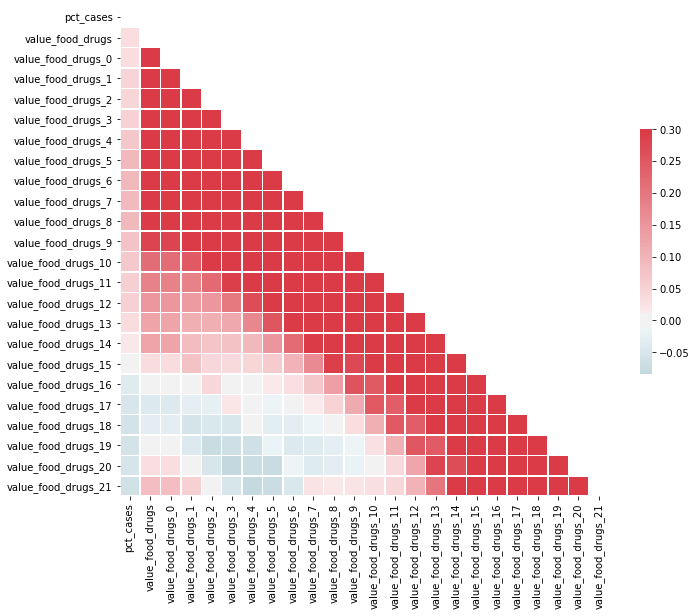

In [20]:
corr =df[np.append([metric],df.filter(like='value_food_drugs').columns.values)].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

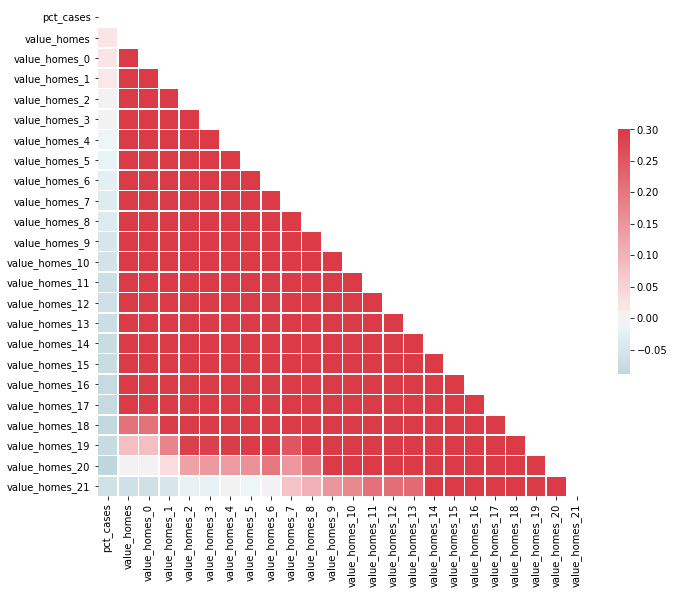

In [21]:
corr =df[np.append([metric],df.filter(like='value_homes').columns.values)].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

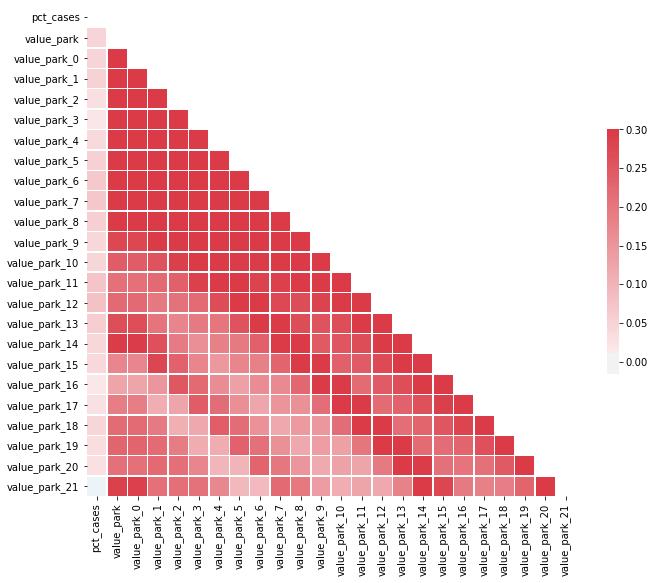

In [22]:
corr =df[np.append([metric],df.filter(like='value_park').columns.values)].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

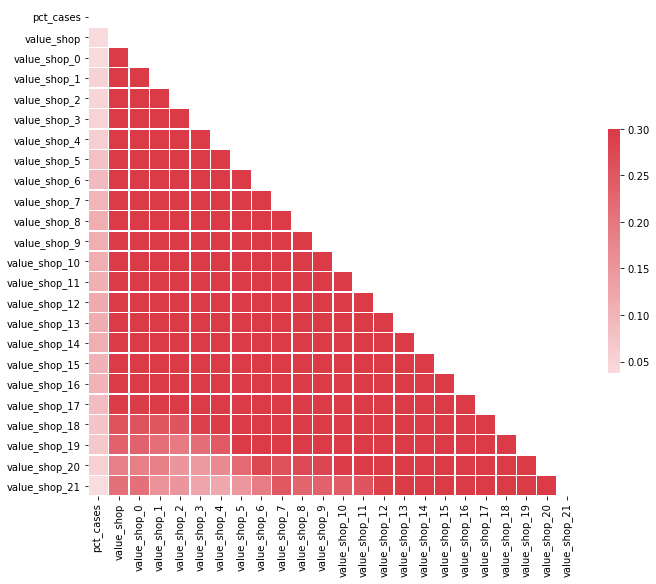

In [23]:
corr =df[np.append([metric],df.filter(like='value_shop').columns.values)].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

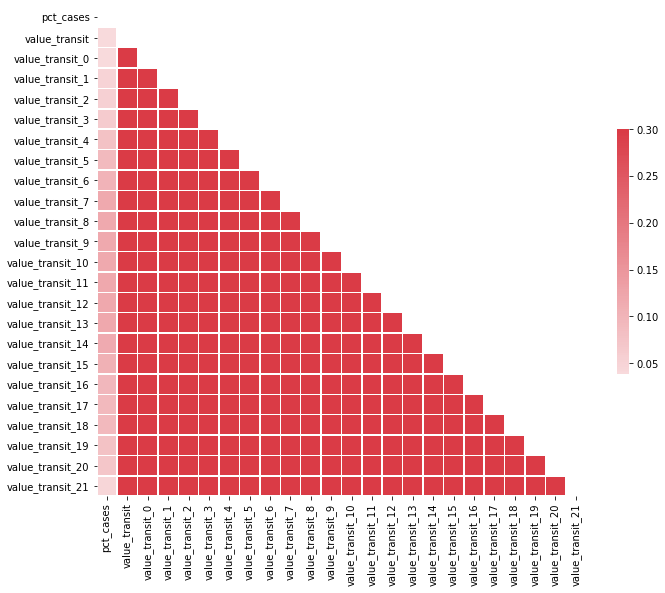

In [24]:
corr =df[np.append([metric],df.filter(like='value_transit').columns.values)].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

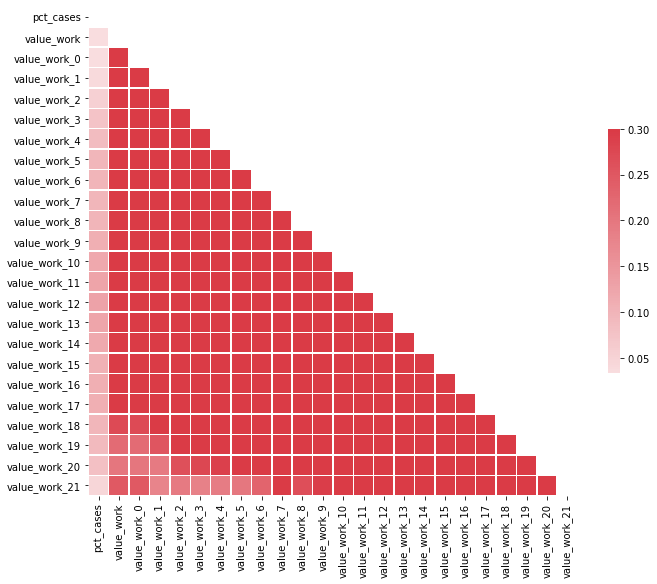

In [25]:
corr =df[np.append([metric],df.filter(like='value_work').columns.values)].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [42]:
df.groupby('FIPS')['cases'].sum()

FIPS
1000.0     13514.0
1001.0        99.0
1003.0       234.0
1005.0         5.0
1007.0        27.0
            ...   
56035.0        9.0
56037.0       28.0
56039.0      269.0
56041.0        6.0
56043.0       16.0
Name: cases, Length: 1963, dtype: float64

In [44]:
df.groupby('FIPS')['cases'].sum()

FIPS
1000.0     13514.0
1001.0        99.0
1003.0       234.0
1005.0         5.0
1007.0        27.0
            ...   
56035.0        9.0
56037.0       28.0
56039.0      269.0
56041.0        6.0
56043.0       16.0
Name: cases, Length: 1963, dtype: float64

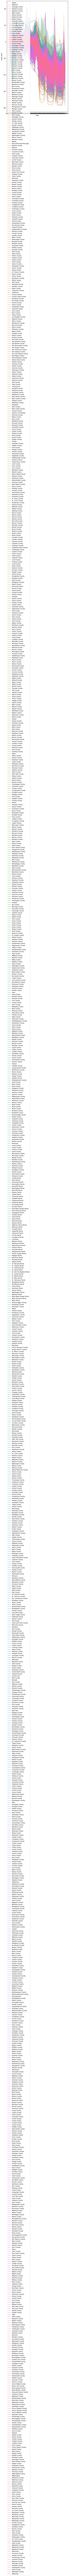

In [27]:
f, ax = plt.subplots(1,1,figsize=(8,15))
sns.lineplot(x='date',y='value_work',hue='region',data=df,ax=ax)